In [1]:
push!(LOAD_PATH,"../src")
push!(LOAD_PATH,"../models/")

4-element Array{Union(ASCIIString,UTF8String),1}:
 "/usr/local/share/julia/site/v0.3"
 "/usr/share/julia/site/v0.3"      
 "../src"                          
 "../models/"                      

In [2]:
using SGMCMC
using DataModel
using Banana
using PyPlot

INFO: Loading help data...


In [3]:
dm = BananaModel()

BananaModel()

# HMC

In [4]:
shmc = HMCState(zeros(2),stepsize=0.1)

HMCState([0.0,0.0],[-1.13813,-0.410168],0.1,10,[1.0,1.0])

In [5]:
function plot_contour(f, range_x, range_y)
    grid_x = [i for i in range_x, j in range_y]
    grid_y = [j for i in range_x, j in range_y]

    grid_f = [exp(f(i,j)) for i in range_x, j in range_y]

    PyPlot.contour(grid_x', grid_y', grid_f', 1)
end

plot_contour (generic function with 1 method)

In [6]:
function run(s::SamplerState,dm::AbstractDataModel;num_iterations=1000, final_plot=false)
    grad = getgrad(dm)
    llik = getllik(dm)
    samples = zeros(num_iterations, length(s.x))

    for i = 1:num_iterations

        sample!(s,llik,grad)

        samples[i,:] = s.x
    end
     
    if final_plot
        if length(s.x) == 2
            PyPlot.clf()
            llik(x,y) = llik([x,y])
            plot_contour(llik, -5:.05:6, -1:.05:32)
            PyPlot.scatter(samples[:,1], samples[:,2])
        end
    end

    samples
end

run (generic function with 1 method)

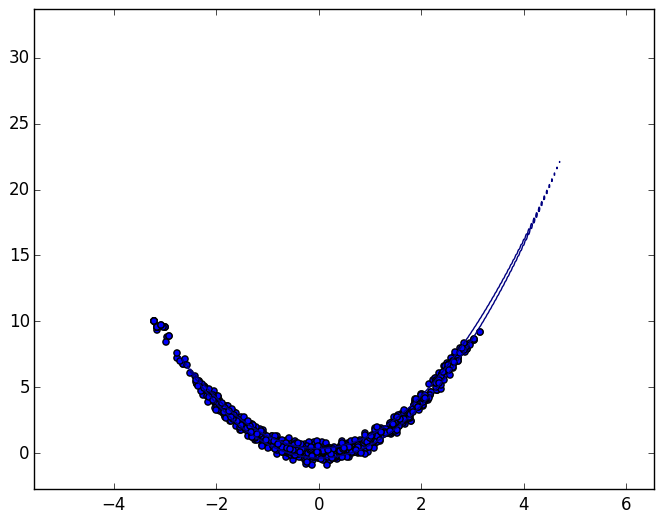

In [7]:
run(shmc,dm,final_plot=true);

# Relativistic HMC

In [8]:
srhmc = RelHMCState(zeros(2),stepsize=0.1)

SGMCMC.RelHMCState([0.0,0.0],[-1.7075687352208404,-0.7340335897642608],0.1,10,1.0,[1.0,1.0])

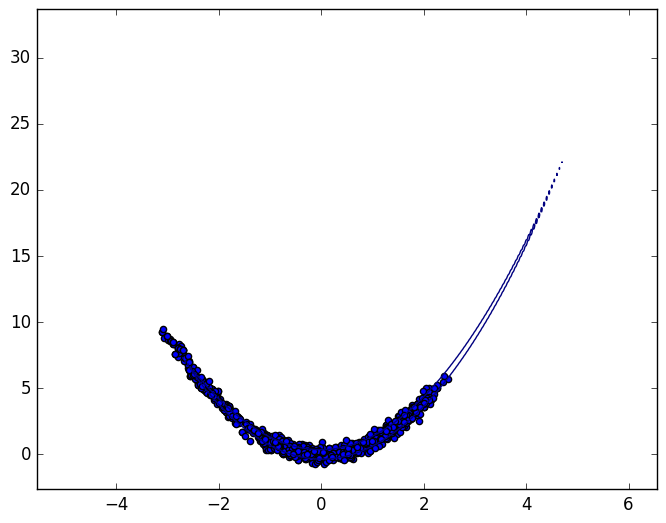

In [9]:
run(srhmc,dm,final_plot=true);

# Stochastic Gradient Relativistic HMC

In [10]:
ssgrhmc = SGRelHMCState(zeros(2),stepsize=0.01)

SGMCMC.SGRelHMCState([0.0,0.0],[-0.49263767497543365,0.6003227124549538],10,0.01,[1.0],[1.0],[1.0],[0.0],false)

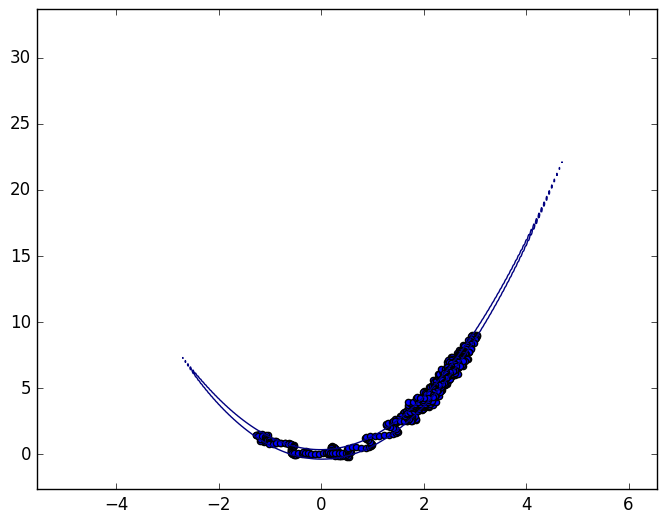

In [11]:
run(ssgrhmc, dm, final_plot=true);